In [1]:
import pandas as pd
bike = pd.read_csv('day.csv')

In [14]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
X, y = bike.iloc[:, 3:].values,bike.iloc[:, 2].values
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [4]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[  4.00464070e+00   1.81975906e+00   1.65371279e+00   1.21942783e+00
   1.05592018e+00   9.86265494e-01   7.46450462e-01   8.69363792e-01
   2.91498247e-01   2.42562512e-01   1.26503712e-01   9.38542037e-03
  -1.60766588e-16]


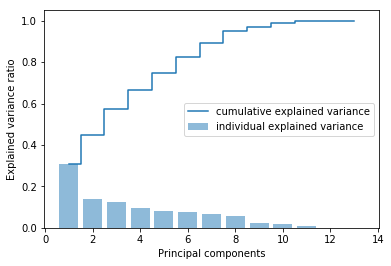

In [5]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center',
label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [6]:
eigen_pairs =[(np.abs(eigen_vals[i]),eigen_vecs[:,i])
...        for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

In [7]:
w= np.hstack((eigen_pairs[0][1][:, np.newaxis],
...
eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n',w)

Matrix W:
 [[ 0.21303888  0.27347335]
 [ 0.18977826 -0.2259647 ]
 [-0.01540598 -0.01446838]
 [ 0.01530147  0.01828247]
 [-0.0069369   0.03134521]
 [-0.11336665 -0.53477197]
 [ 0.41062974 -0.19572149]
 [ 0.41252333 -0.20741875]
 [ 0.02136015 -0.65629149]
 [-0.17813309  0.17171821]
 [ 0.35785299  0.00138894]
 [ 0.42720178  0.1648654 ]
 [ 0.4729556   0.13389355]]


In [8]:
X_train_std[0].dot(w)

array([ 2.84850967,  1.6033767 ])

In [9]:
X_train_pca = X_train_std.dot(w)

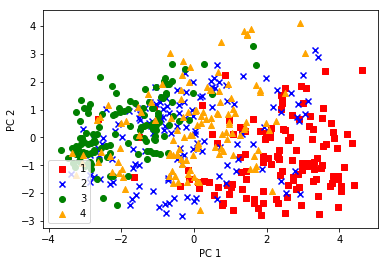

In [19]:
colors = ['r', 'b', 'green','orange']
markers = ['s', 'x', 'o','^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
    X_train_pca[y_train==l, 1],
    c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

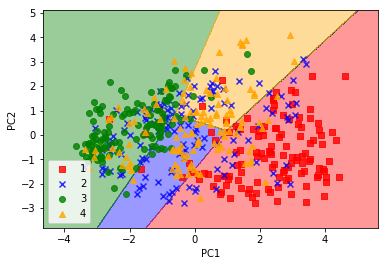

In [20]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'green', 'orange', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
# plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
    marker=markers[idx], label=cl)
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

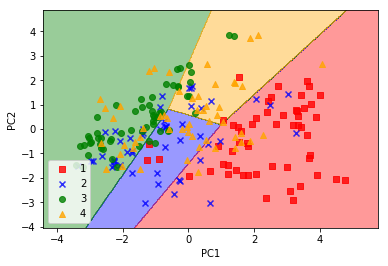

In [21]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

In [13]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([  3.07446448e-01,   1.39707530e-01,   1.26959735e-01,
         9.36185750e-02,   8.10656768e-02,   7.57181096e-02,
         6.67432687e-02,   5.73068999e-02,   2.23790616e-02,
         1.86221408e-02,   9.71201159e-03,   7.20542585e-04,
         3.58495473e-33])